# Ahmed Mamdouh Khaled

# Import Libraries

Matplotlib is primarily used for basic chart plotting, while Seaborn offers many default themes and a wide variety of schemes for statistical visualization.It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library.

In [91]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from sklearn.preprocessing import LabelEncoder # type: ignore
import panel as pn # type: ignore
pn.extension('tabulator') # that is for creating interactive tables
import hvplot.pandas # that is for creating interactive dataframes # type: ignore
import plotly.express as px # type: ignore
import plotly.graph_objects as go # type: ignore


# Reading data_set

In [92]:
pubg = pd.read_csv("pubg-weapon-stats.csv")
pubg.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


# Data set Information

In [93]:
pubg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            44 non-null     object 
 1   Weapon Type            44 non-null     object 
 2   Bullet Type            38 non-null     float64
 3   Damage                 44 non-null     int64  
 4   Magazine Capacity      44 non-null     int64  
 5   Range                  38 non-null     float64
 6   Bullet Speed           36 non-null     float64
 7   Rate of Fire           44 non-null     float64
 8   Shots to Kill (Chest)  44 non-null     int64  
 9   Shots to Kill (Head)   44 non-null     int64  
 10  Damage Per Second      44 non-null     float64
 11  Fire Mode              44 non-null     object 
 12  BDMG_0                 37 non-null     float64
 13  BDMG_1                 37 non-null     float64
 14  BDMG_2                 37 non-null     float64
 15  BDMG_3  

In [94]:
pubg.dtypes

Weapon Name               object
Weapon Type               object
Bullet Type              float64
Damage                     int64
Magazine Capacity          int64
Range                    float64
Bullet Speed             float64
Rate of Fire             float64
Shots to Kill (Chest)      int64
Shots to Kill (Head)       int64
Damage Per Second        float64
Fire Mode                 object
BDMG_0                   float64
BDMG_1                   float64
BDMG_2                   float64
BDMG_3                   float64
HDMG_0                   float64
HDMG_1                   float64
HDMG_2                   float64
HDMG_3                   float64
dtype: object

# Data Exploration

In [95]:
pubg.describe()

,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
count,38.000000,44.000000,44.000000,38.000000,36.000000,44.000000,44.000000,44.000000,44.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,6.747632,63.340909,18.431818,403.552632,615.777778,0.388670,3.840909,2.136364,394.102500,68.081081,47.929730,41.02973,30.762162,125.756757,88.024324,75.418919,56.554054
std,3.336421,47.134613,18.421925,297.886492,256.455077,0.712255,1.829261,0.851562,230.785698,57.379254,40.074853,34.22249,25.699852,66.445937,46.555728,39.888009,29.872717
min,0.300000,18.000000,1.000000,25.000000,250.000000,0.010000,1.000000,1.000000,28.000000,22.400000,15.700000,13.40000,10.100000,44.900000,31.400000,26.900000,20.200000
25%,5.560000,41.000000,5.000000,52.500000,350.000000,0.063375,3.000000,2.000000,199.377500,41.000000,30.100000,25.80000,19.300000,96.300000,67.400000,57.800000,43.300000
50%,7.620000,48.500000,12.500000,400.000000,715.000000,0.091000,4.000000,2.000000,463.000000,47.000000,33.800000,28.90000,21.700000,109.600000,76.700000,65.700000,49.300000
75%,9.000000,60.250000,30.000000,600.000000,859.750000,0.347500,4.250000,2.250000,509.000000,60.900000,42.600000,36.50000,27.400000,136.300000,95.400000,81.700000,61.300000
max,12.000000,216.000000,100.000000,900.000000,990.000000,3.800000,10.000000,4.000000,1080.000000,282.600000,198.000000,169.20000,126.900000,312.300000,218.700000,187.200000,140.400000


# Checking For Nulls

In [96]:
pubg[pubg.columns[pubg.isnull().sum()>0]].isnull().sum()

Bullet Type     6
Range           6
Bullet Speed    8
BDMG_0          7
BDMG_1          7
BDMG_2          7
BDMG_3          7
HDMG_0          7
HDMG_1          7
HDMG_2          7
HDMG_3          7
dtype: int64

# Removing Duplicates

In [97]:
pubg = pubg.drop_duplicates()
pubg

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.0800,4,2,612.00,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.0100,4,2,490.00,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.0860,4,2,547.00,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.0100,4,2,490.00,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
5,SCAR-L,Assault Rifle,5.56,43,30,600.0,880.0,0.0960,4,2,448.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
6,M416,Assault Rifle,5.56,43,30,600.0,890.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
7,M16A4,Assault Rifle,5.56,43,30,600.0,900.0,0.0100,4,2,430.00,"Single, Burst",43.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
8,G36C,Assault Rifle,5.56,43,30,600.0,880.0,0.0860,4,2,502.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4
9,OBZ,Assault Rifle,5.56,43,30,600.0,880.0,0.0960,4,2,466.00,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


# Cleaning string
#### strip() removes leading and trailing spaces to return a copy of the original string

In [98]:
# Modify the 'Fire Mode' column in place
pubg['Fire Mode'] = pubg['Fire Mode'].str.strip()
pubg['Fire Mode'] = pubg['Fire Mode'].str.lower()


In [99]:
pubg['Fire Mode']

0     single, automatic, burst
1            single, automatic
2     single, automatic, burst
3                single, burst
4            single, automatic
5            single, automatic
6            single, automatic
7                single, burst
8            single, automatic
9            single, automatic
10                   automatic
11                   automatic
12    single, automatic, burst
13           single, automatic
14           single, automatic
15    single, automatic, burst
16           single, automatic
17    single, automatic, burst
18                   automatic
19                   automatic
20                   automatic
21           single, automatic
22                   automatic
23                   automatic
24                   automatic
25                   automatic
26                   automatic
27                      single
28                      single
29                      single
30                      single
31                   automatic
32      

# FillNa in numeric columns


The inplace=True parameter in pandas methods specifies whether the operation should modify the DataFrame in place or return a new DataFrame with the changes applied.

In [100]:
#BDMG => Body Damage
#HDMG =>Head Damage
import warnings


pubg['Bullet Type'].fillna(pubg['Bullet Type'].mode()[0], inplace=True)


def fillna_with_mean(column_names):
    for column_name in column_names:
        pubg[column_name].fillna(pubg[column_name].mean(), inplace=True)

c_names = ['Damage', 'Magazine Capacity', 'Range', 'Bullet Speed', 'Rate of Fire', 'Shots to Kill (Chest)', 'Shots to Kill (Head)', 'Damage Per Second', 'BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3', 'HDMG_0', 'HDMG_1', 'HDMG_2', 'HDMG_3']

fillna_with_mean(c_names)

warnings.simplefilter(action='ignore', category=FutureWarning)


# FillNa in Object Columns 


In [101]:
pubg['Fire Mode'].fillna('Not Available', inplace=True)



# Removing Irrelevant Records 

In [102]:
for x in pubg.index:
    if pubg.loc[x,'Weapon Type']=='Other':
        pubg.drop(x,inplace = True)
pubg.reset_index(drop = True)

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.000000,715.000000,0.0800,4,2,612.00,"single, automatic, burst",47.000000,34.30000,29.40000,22.000000,115.100000,80.600000,69.000000,51.800000
1,AKM,Assault Rifle,7.62,49,30,400.000000,710.000000,0.0100,4,2,490.00,"single, automatic",47.000000,34.30000,29.40000,22.000000,115.100000,80.600000,69.000000,51.800000
2,M762,Assault Rifle,7.62,47,30,400.000000,715.000000,0.0860,4,2,547.00,"single, automatic, burst",46.000000,32.90000,28.20000,21.100000,110.400000,77.300000,66.200000,49.700000
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.000000,715.000000,0.0100,4,2,490.00,"single, burst",49.000000,34.30000,29.40000,22.000000,115.100000,80.600000,69.000000,51.800000
4,AUG A3,Assault Rifle,5.56,43,30,600.000000,880.000000,0.0860,4,2,502.00,"single, automatic",41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
5,SCAR-L,Assault Rifle,5.56,43,30,600.000000,880.000000,0.0960,4,2,448.00,"single, automatic",41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
6,M416,Assault Rifle,5.56,43,30,600.000000,890.000000,0.0860,4,2,502.00,"single, automatic",41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
7,M16A4,Assault Rifle,5.56,43,30,600.000000,900.000000,0.0100,4,2,430.00,"single, burst",43.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
8,G36C,Assault Rifle,5.56,43,30,600.000000,880.000000,0.0860,4,2,502.00,"single, automatic",41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
9,OBZ,Assault Rifle,5.56,43,30,600.000000,880.000000,0.0960,4,2,466.00,"single, automatic",41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000


# Removing Outliers from the data

In [103]:
columns = pubg.select_dtypes(include = 'number')
def Removing_outliers(columns):
    for column in columns:
        Q1 = pubg[column].quantile(0.25)
        Q3 = pubg[column].quantile(0.75)
        IQR = Q3 - Q1

    #Calculate the lower and upper limits
        lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter out the outliers
    pubg = pubg[(pubg[column] >= lower_limit) & (pubg[column] <= upper_limit)]
    pubg.reset_index(drop=True, inplace=True)


In [104]:
pubg.reset_index(drop=True, inplace=True)
pubg

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.000000,715.000000,0.0800,4,2,612.00,"single, automatic, burst",47.000000,34.30000,29.40000,22.000000,115.100000,80.600000,69.000000,51.800000
1,AKM,Assault Rifle,7.62,49,30,400.000000,710.000000,0.0100,4,2,490.00,"single, automatic",47.000000,34.30000,29.40000,22.000000,115.100000,80.600000,69.000000,51.800000
2,M762,Assault Rifle,7.62,47,30,400.000000,715.000000,0.0860,4,2,547.00,"single, automatic, burst",46.000000,32.90000,28.20000,21.100000,110.400000,77.300000,66.200000,49.700000
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.000000,715.000000,0.0100,4,2,490.00,"single, burst",49.000000,34.30000,29.40000,22.000000,115.100000,80.600000,69.000000,51.800000
4,AUG A3,Assault Rifle,5.56,43,30,600.000000,880.000000,0.0860,4,2,502.00,"single, automatic",41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
5,SCAR-L,Assault Rifle,5.56,43,30,600.000000,880.000000,0.0960,4,2,448.00,"single, automatic",41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
6,M416,Assault Rifle,5.56,43,30,600.000000,890.000000,0.0860,4,2,502.00,"single, automatic",41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
7,M16A4,Assault Rifle,5.56,43,30,600.000000,900.000000,0.0100,4,2,430.00,"single, burst",43.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
8,G36C,Assault Rifle,5.56,43,30,600.000000,880.000000,0.0860,4,2,502.00,"single, automatic",41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
9,OBZ,Assault Rifle,5.56,43,30,600.000000,880.000000,0.0960,4,2,466.00,"single, automatic",41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000


## Visualizing Fire Mode , Shots to kill (Head) ,Shots to kill (Chest) in pie chart

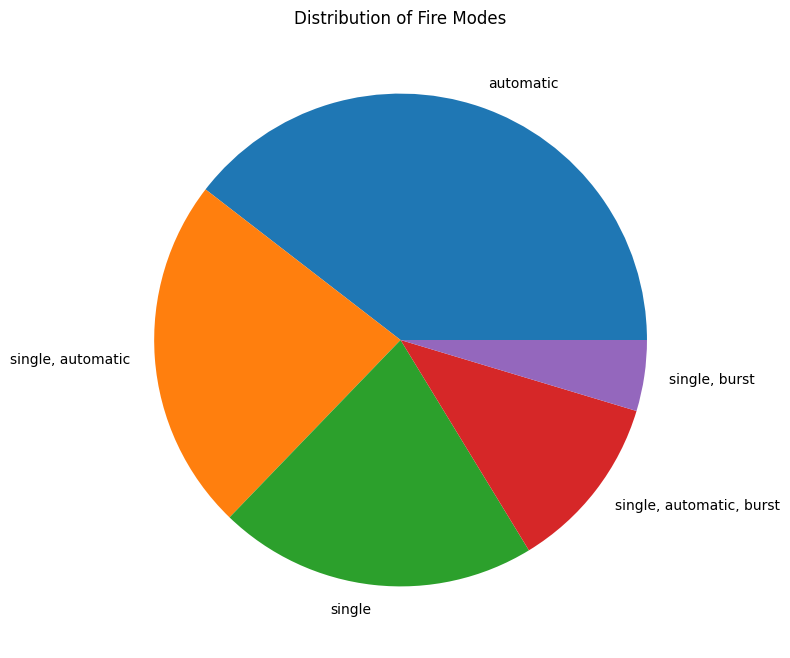

In [105]:
pubg['Fire Mode'].value_counts().plot.pie(figsize=(8, 8))
plt.title('Distribution of Fire Modes')
plt.ylabel('')
plt.show()

## Export the dataframe to excel file


In [106]:
file_name = 'cleaned_pubg.xlsx'
pubg.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Change object columns to numeric columns

In [107]:


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
pubg['Weapon Name'] = label_encoder.fit_transform(pubg['Weapon Name'])
pubg['Weapon Type'] = label_encoder.fit_transform(pubg['Weapon Type'])
pubg['Fire Mode'] = label_encoder.fit_transform(pubg['Fire Mode'])


In [108]:
pubg.skew()

Weapon Name              0.000000
Weapon Type              0.171925
Bullet Type             -0.784578
Damage                   2.441952
Magazine Capacity        2.195265
Range                   -0.018031
Bullet Speed            -0.215685
Rate of Fire             2.391821
Shots to Kill (Chest)    1.209313
Shots to Kill (Head)     0.676118
Damage Per Second        0.193126
Fire Mode                0.636737
BDMG_0                   2.606345
BDMG_1                   2.614546
BDMG_2                   2.611294
BDMG_3                   2.610400
HDMG_0                   1.588582
HDMG_1                   1.590232
HDMG_2                   1.590857
HDMG_3                   1.583123
dtype: float64

# Correlations Between Columns


In [109]:
pubg.corr()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
Weapon Name,1.000000,0.412576,0.058852,0.108691,-0.287303,-0.395314,-0.543336,-0.243408,0.097481,0.272109,0.108047,-0.236661,0.113683,0.108676,0.107930,0.108143,-0.035773,-0.035803,-0.035680,-0.036516
Weapon Type,0.412576,1.000000,-0.029510,0.213842,-0.202594,-0.441504,-0.665606,0.384776,0.054708,0.192684,-0.226615,-0.123745,0.257017,0.249365,0.249193,0.249773,0.130741,0.130369,0.130408,0.130773
Bullet Type,0.058852,-0.029510,1.000000,0.409223,-0.131576,-0.283587,-0.215278,-0.089431,-0.087484,-0.112378,0.315263,-0.156228,0.402635,0.403086,0.402653,0.402687,0.260302,0.260622,0.260193,0.260022
Damage,0.108691,0.213842,0.409223,1.000000,-0.359407,-0.233683,-0.122297,0.293258,-0.687472,-0.677721,0.266860,-0.338123,0.945874,0.946046,0.945834,0.946051,0.870470,0.870374,0.870219,0.869955
Magazine Capacity,-0.287303,-0.202594,-0.131576,-0.359407,1.000000,0.060220,0.182527,-0.411793,0.245871,0.219189,0.345636,0.298563,-0.397799,-0.395860,-0.395524,-0.395988,-0.417227,-0.417014,-0.417035,-0.417556
Range,-0.395314,-0.441504,-0.283587,-0.233683,0.060220,1.000000,0.799199,0.293144,-0.279911,-0.338466,-0.158153,0.165541,-0.214551,-0.212622,-0.211629,-0.211681,0.070984,0.070609,0.070980,0.071925
Bullet Speed,-0.543336,-0.665606,-0.215278,-0.122297,0.182527,0.799199,1.000000,0.155739,-0.269158,-0.423417,-0.050027,0.118176,-0.131560,-0.126537,-0.125637,-0.126028,0.142669,0.142677,0.142788,0.143432
Rate of Fire,-0.243408,0.384776,-0.089431,0.293258,-0.411793,0.293144,0.155739,1.000000,-0.390807,-0.478272,-0.654064,-0.154890,0.345548,0.343458,0.344405,0.344669,0.541132,0.540819,0.540933,0.542282
Shots to Kill (Chest),0.097481,0.054708,-0.087484,-0.687472,0.245871,-0.279911,-0.269158,-0.390807,1.000000,0.923723,-0.120021,0.181073,-0.576724,-0.577188,-0.577545,-0.577494,-0.654068,-0.653803,-0.653841,-0.654264
Shots to Kill (Head),0.272109,0.192684,-0.112378,-0.677721,0.219189,-0.338466,-0.423417,-0.478272,0.923723,1.000000,-0.036830,0.150529,-0.586049,-0.588327,-0.588940,-0.588700,-0.712229,-0.712124,-0.712016,-0.712675


In [110]:
pubg

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,6,0,7.62,49,30,400.000000,715.000000,0.0800,4,2,612.00,3,47.000000,34.30000,29.40000,22.000000,115.100000,80.600000,69.000000,51.800000
1,0,0,7.62,49,30,400.000000,710.000000,0.0100,4,2,490.00,2,47.000000,34.30000,29.40000,22.000000,115.100000,80.600000,69.000000,51.800000
2,12,0,7.62,47,30,400.000000,715.000000,0.0860,4,2,547.00,3,46.000000,32.90000,28.20000,21.100000,110.400000,77.300000,66.200000,49.700000
3,14,0,7.62,49,30,500.000000,715.000000,0.0100,4,2,490.00,4,49.000000,34.30000,29.40000,22.000000,115.100000,80.600000,69.000000,51.800000
4,1,0,5.56,43,30,600.000000,880.000000,0.0860,4,2,502.00,2,41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
5,31,0,5.56,43,30,600.000000,880.000000,0.0960,4,2,448.00,2,41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
6,11,0,5.56,43,30,600.000000,890.000000,0.0860,4,2,502.00,2,41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
7,8,0,5.56,43,30,600.000000,900.000000,0.0100,4,2,430.00,4,43.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
8,5,0,5.56,43,30,600.000000,880.000000,0.0860,4,2,502.00,2,41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000
9,18,0,5.56,43,30,600.000000,880.000000,0.0960,4,2,466.00,2,41.000000,30.10000,25.80000,19.300000,101.000000,70.700000,60.600000,45.400000


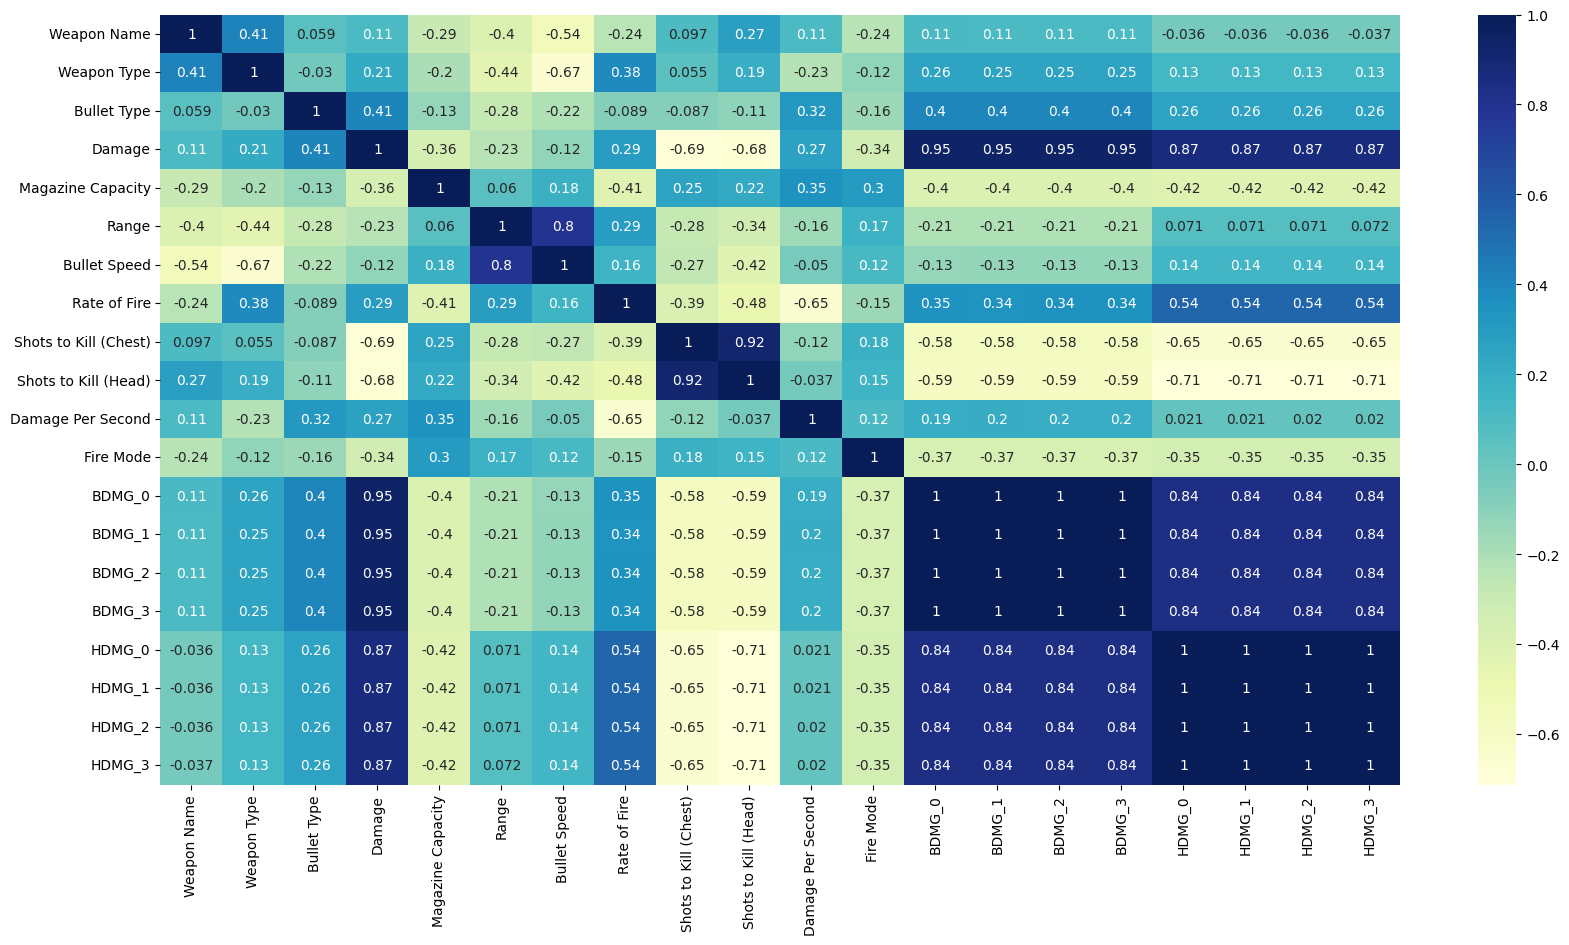

In [111]:

# Plot Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pubg.corr(), annot=True, cmap="YlGnBu")

plt.show()


## BDMG Columns Visualization and Showing the trend across values in each column

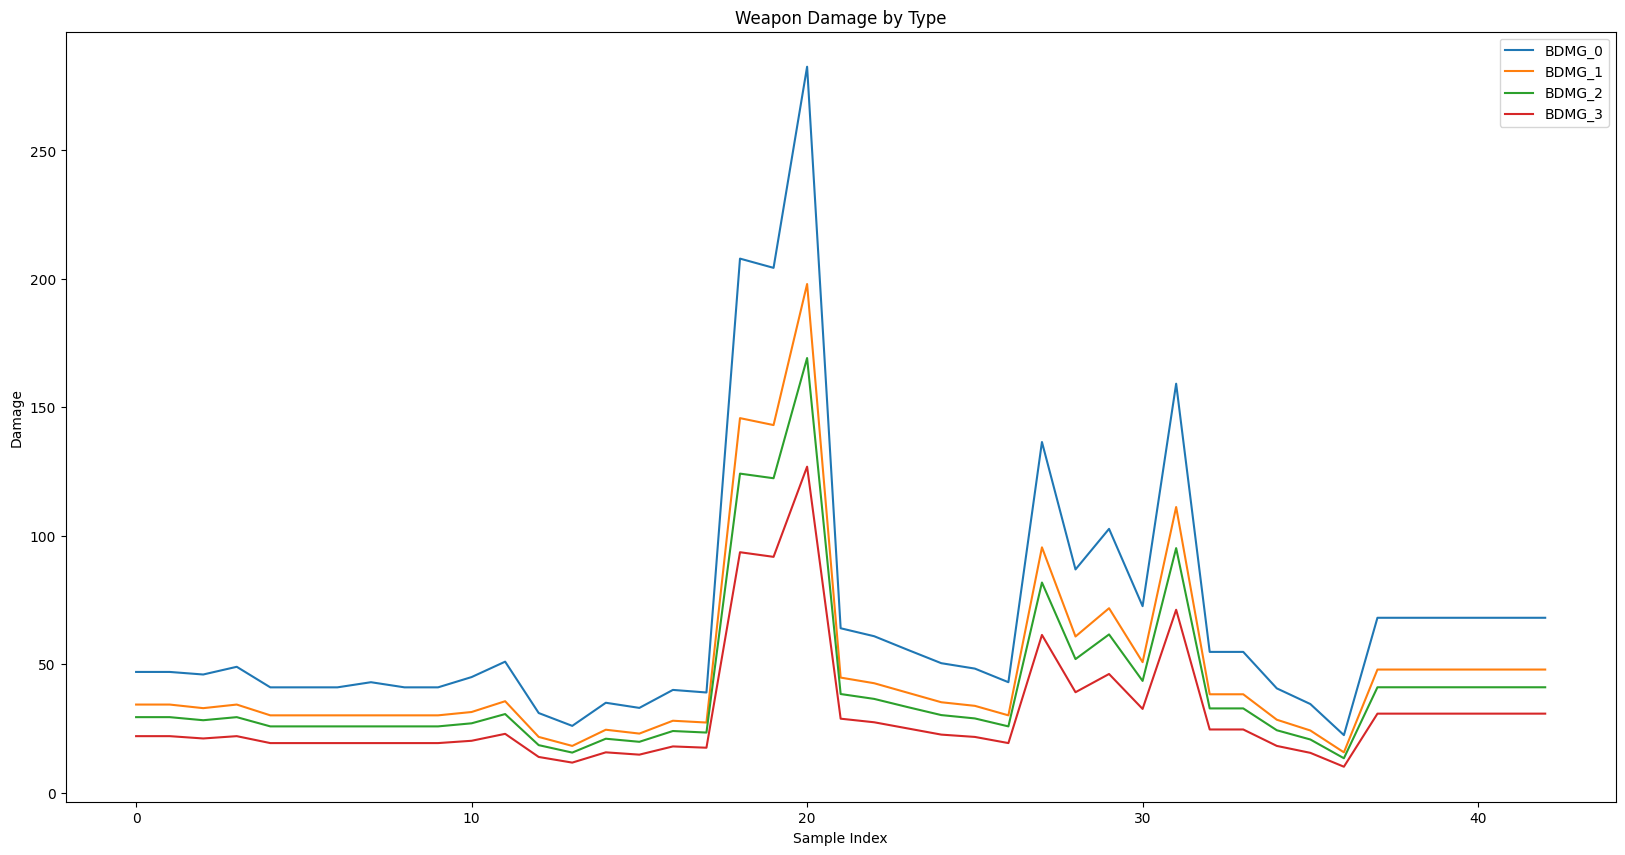

In [113]:
# Create a single figure
plt.figure(figsize=(20, 10))

# Define the weapon types and corresponding damage columns
weapon_types = ['BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3']

# Plotting each weapon type's damage values on the same axes
for weapon_type in weapon_types:
    plt.plot(pubg[weapon_type], label=weapon_type)

plt.legend()  # Add legend to distinguish weapon types
plt.xlabel('Sample Index')
plt.ylabel('Damage')
plt.title('Weapon Damage by Type')
plt.show()



<Axes: >

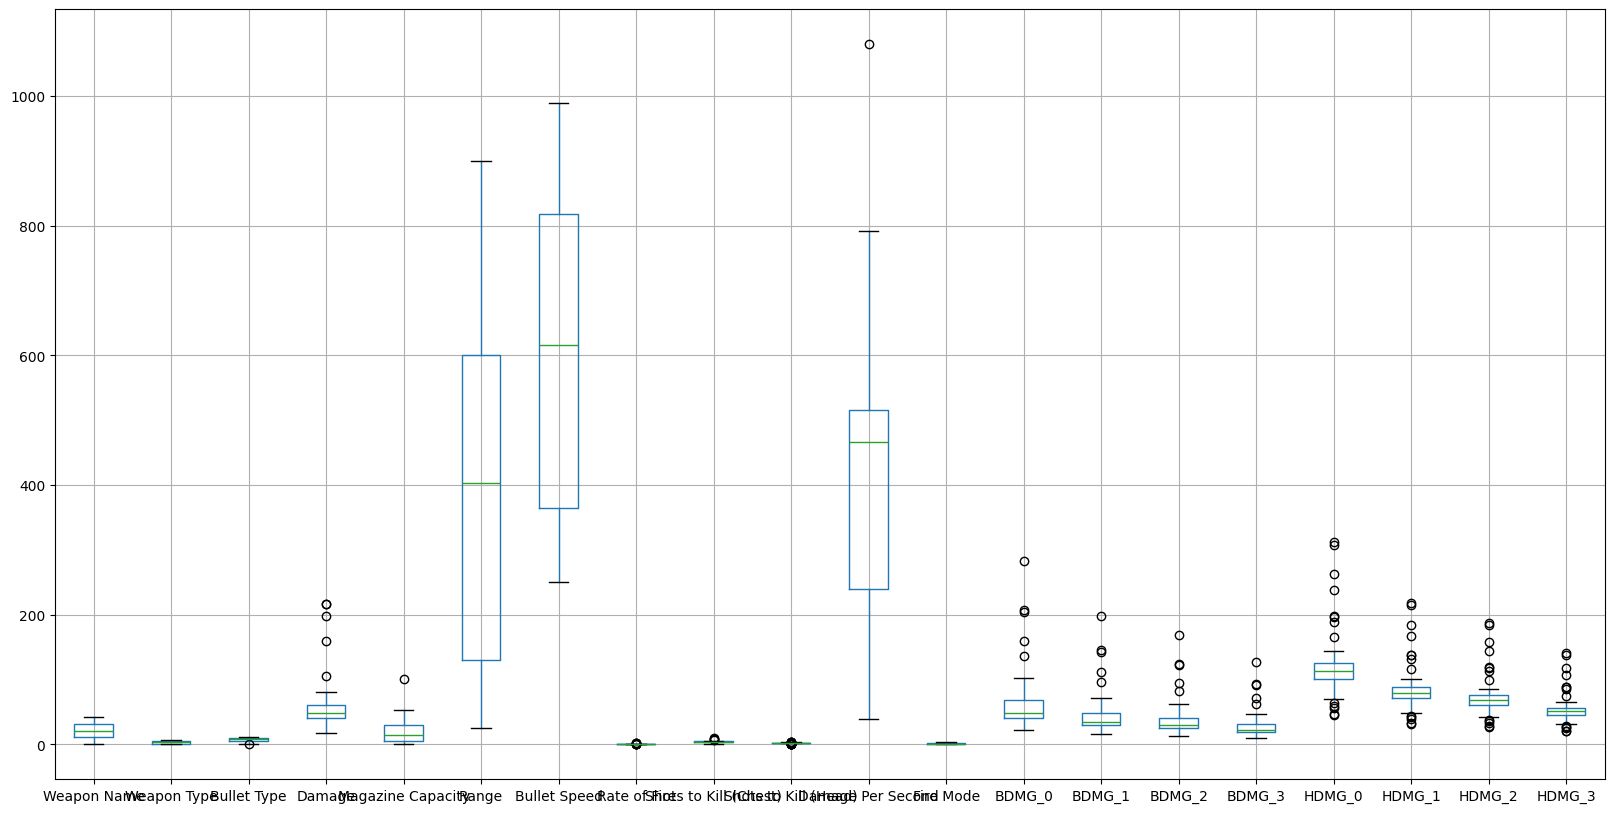

In [114]:
pubg.boxplot(figsize=(20,10))

## HDMG Columns Visualization and Showing the trend across values in each column

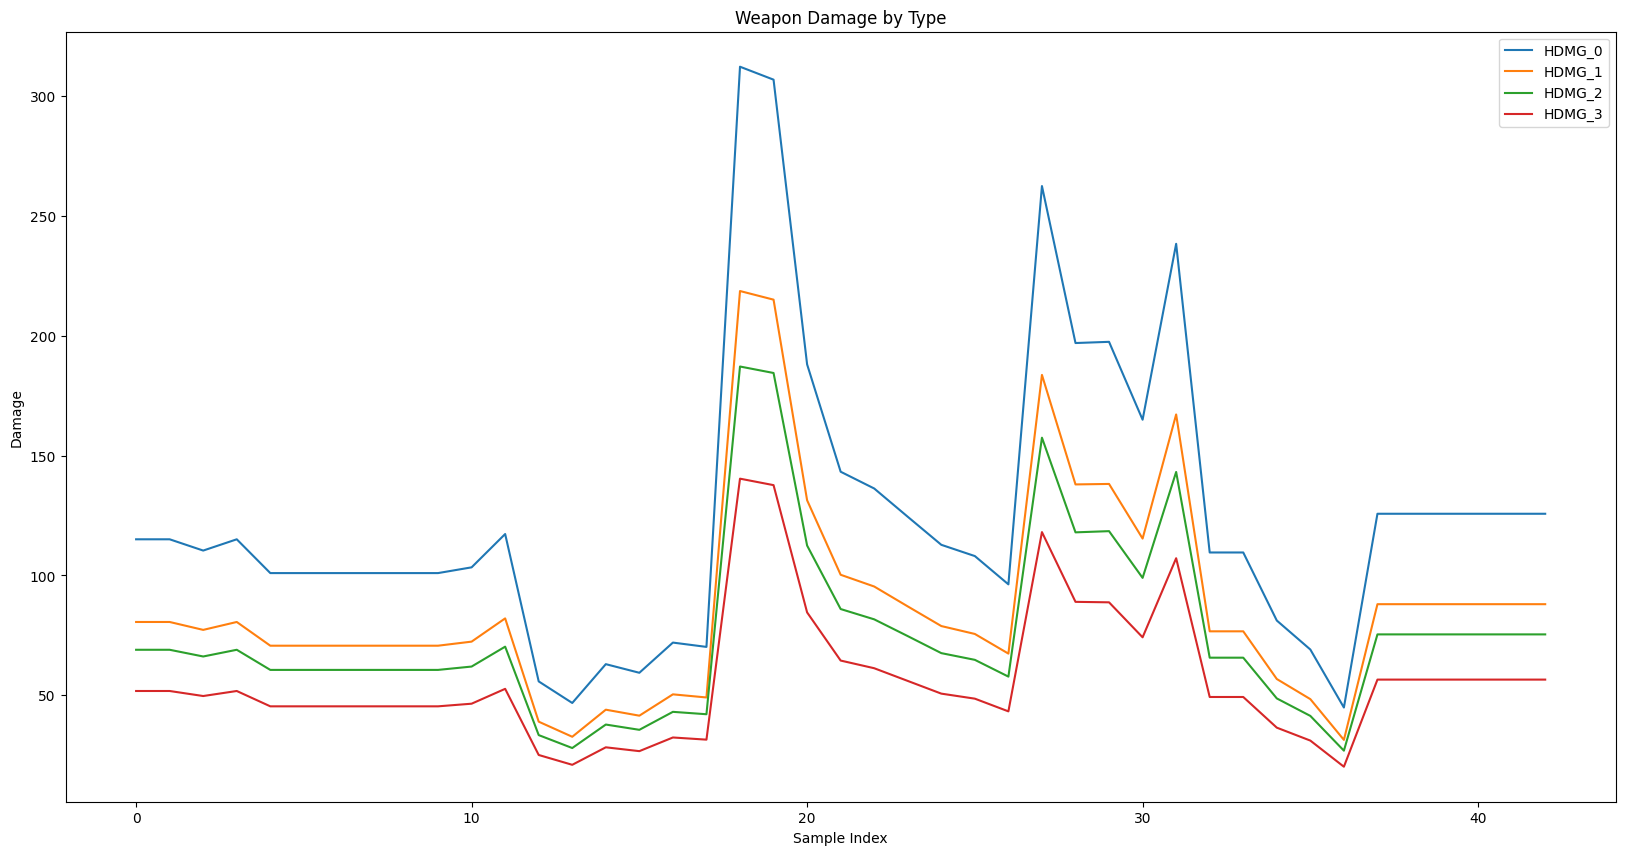

In [115]:
# Create a single figure
plt.figure(figsize=(20, 10))

# Define the weapon types and corresponding damage columns
weapon_types = ['HDMG_0', 'HDMG_1', 'HDMG_2', 'HDMG_3']

# Plotting each weapon type's damage values on the same axes
for weapon_type in weapon_types:
    plt.plot(pubg[weapon_type], label=weapon_type)

plt.legend()  # Add legend to distinguish weapon types
plt.xlabel('Sample Index')
plt.ylabel('Damage')
plt.title('Weapon Damage by Type')
plt.show()

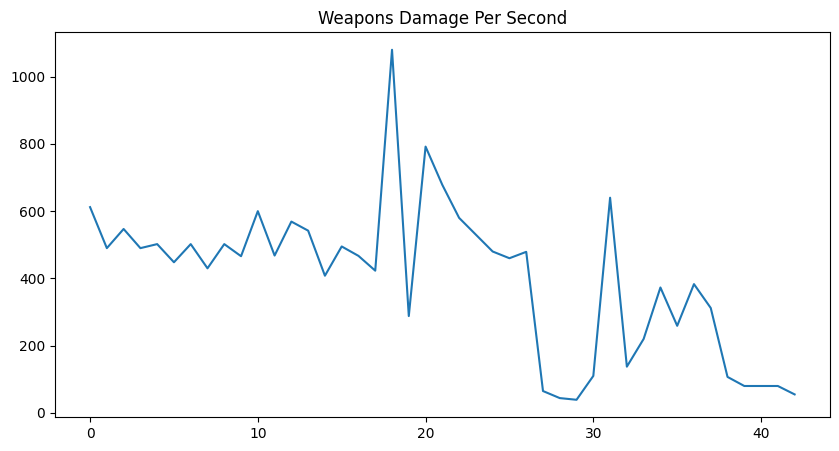

In [116]:
#Damage per second
plt.figure(figsize=(10,5))
plt.title('Weapons Damage Per Second')
pubg['Damage Per Second'].plot(kind= 'line')
plt.show()


# Damage , Magazine Capacity , Rate of Fire ,Bullet Speed


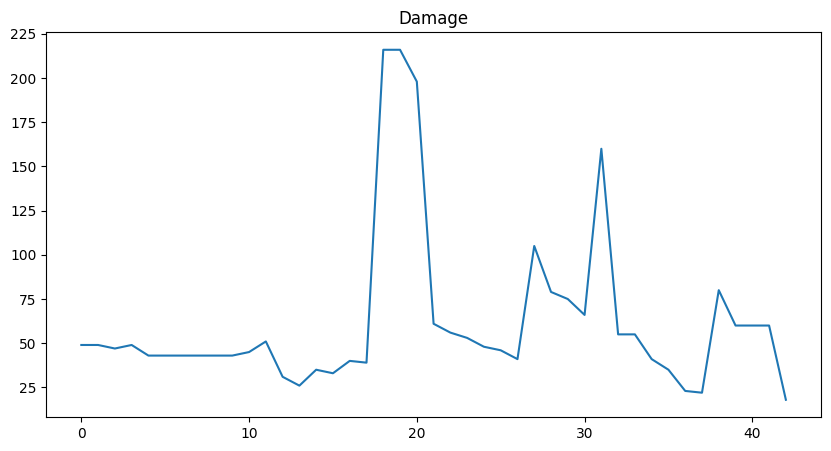

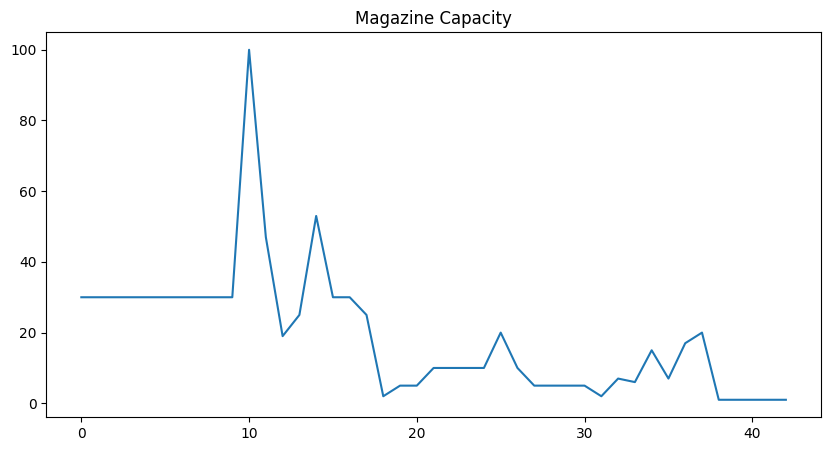

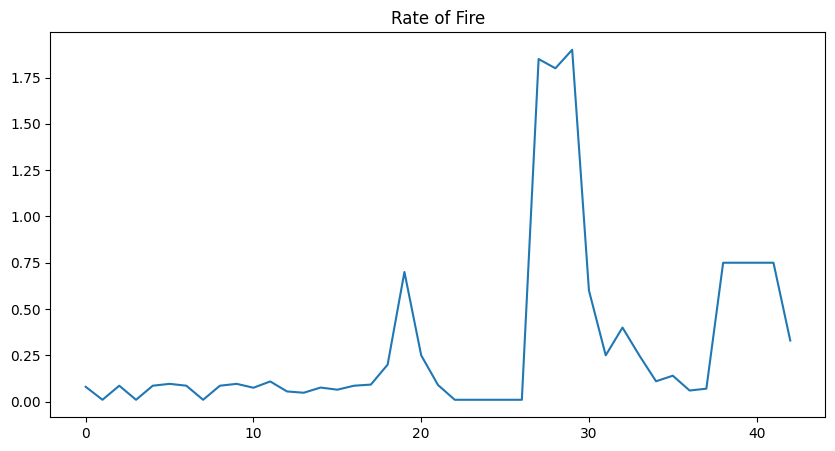

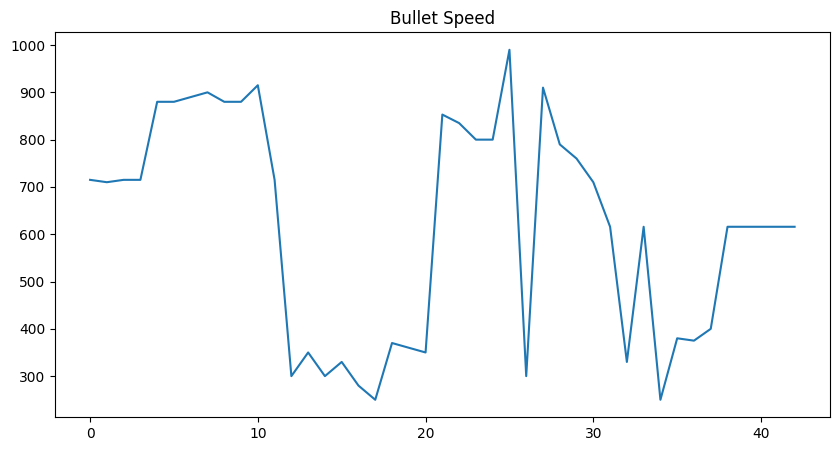

In [117]:
columns = ['Damage' , 'Magazine Capacity' ,'Rate of Fire' ,'Bullet Speed']
def line_Viz (Columns) :
  
    for column in Columns :
        plt.figure(figsize=(10,5))
        plt.plot(pubg[column], label=column)
        plt.title(f'{column}')
        plt.show()
line_Viz(columns)

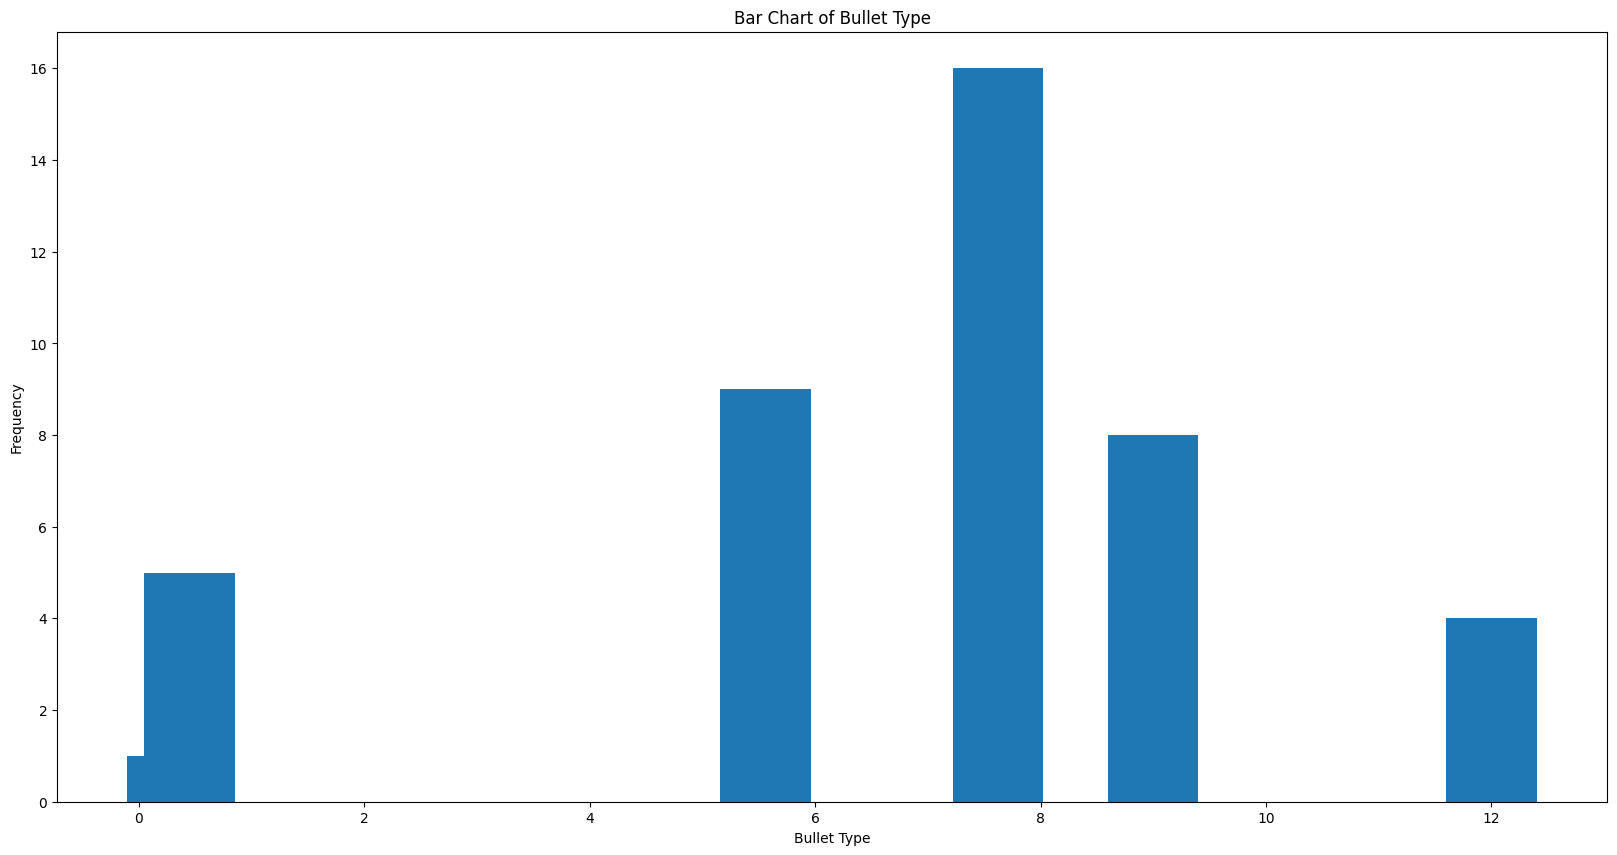

In [118]:
#Bullet type
value_counts = pubg['Bullet Type'].value_counts()
plt.figure(figsize=(20,10))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Bullet Type')
plt.ylabel('Frequency')
plt.title(f'Bar Chart of {'Bullet Type'}')
plt.show()


# Making Dashboards and Interactive Dataframes

In [119]:
ipubg = pubg.interactive()
ipubg

BokehModel(combine_events=True, render_bundle={'docs_json': {'de0b7660-65b7-449f-9022-7923c64bfa0e': {'version…